In [207]:
# imports
import os
import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# import essentia
import IPython.display as ipd
import sklearn

from sklearn.neighbors import BallTree
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity

import fma
from fma import utils
#AUDIO_DIR = os.environ.get('AUDIO_DIR')



In [41]:
# trouble shooting for getting data into a dataframe
sys.path

['/Users/local/anaconda3/envs/metis/lib/python36.zip',
 '/Users/local/anaconda3/envs/metis/lib/python3.6',
 '/Users/local/anaconda3/envs/metis/lib/python3.6/lib-dynload',
 '',
 '/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages',
 '/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/IPython/extensions',
 '/Users/local/.ipython']

In [2]:
# get data into dataframes
tracks = utils.load('../../../Downloads/fma_metadata/tracks.csv')

('track', 'tags')
('album', 'tags')
('artist', 'tags')
('track', 'genres')
('track', 'genres_all')
('track', 'genres_top')


/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [360]:
fullTracks = pd.read_csv('../../../Downloads/fma_metadata/tracks.csv')

In [6]:
tracks = pd.read_csv('../../../Downloads/fma_metadata/raw_tracks.csv')
features = utils.load('../../../Downloads/fma_metadata/features.csv')
genres = utils.load('../../../Downloads/fma_metadata/genres.csv')
echonest = utils.load('../../../Downloads/fma_metadata/echonest.csv')

In [7]:
tracks.sample(5)

,track_id,album_id,album_title,album_url,artist_id,artist_name,artist_url,artist_website,license_image_file,license_image_file_large,...,track_information,track_instrumental,track_interest,track_language_code,track_listens,track_lyricist,track_number,track_publisher,track_title,track_url
78455,114616,17661.0,Tentacle Sketches Vol 1,http://freemusicarchive.org/music/Asthmatic_As...,8693,Asthmatic Astronaut,http://freemusicarchive.org/music/Asthmatic_As...,http://asthmaticastronaut.com/,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,268,NaN,100,NaN,10,NaN,FYI (2013),http://freemusicarchive.org/music/Asthmatic_As...
64538,92943,15259.0,Activité Animale,http://freemusicarchive.org/music/Marc_de_Blan...,14786,Marc de Blanchard,http://freemusicarchive.org/music/Marc_de_Blan...,http://marc.arette.free.fr,http://i.creativecommons.org/l/by-nc-nd/2.0/fr...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,294,NaN,250,NaN,9,NaN,Renard fatigué,http://freemusicarchive.org/music/Marc_de_Blan...
93350,133177,20033.0,Soul Sand,http://freemusicarchive.org/music/Kosta_T/Soul...,15891,Kosta T,http://freemusicarchive.org/music/Kosta_T/,https://soundcloud.com/konstantin-trokay,http://i.creativecommons.org/l/by-nc-sa/4.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1301,NaN,1091,NaN,44,NaN,NY,http://freemusicarchive.org/music/Kosta_T/Soul...
59724,84903,14317.0,Hallmark Cards,http://freemusicarchive.org/music/Jeff_Kolar/H...,16162,Jeff Kolar,http://freemusicarchive.org/music/Jeff_Kolar/,http://www.jeffkolar.us/,http://i.creativecommons.org/l/by-nc-nd/3.0/fr...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1067,NaN,834,NaN,1,NaN,Just My Imagination,http://freemusicarchive.org/music/Jeff_Kolar/H...
106115,149634,22317.0,Instrumental 2,http://freemusicarchive.org/music/Simon_Mathew...,16745,simon_mathewson,http://freemusicarchive.org/music/Simon_Mathew...,NaN,http://i.creativecommons.org/l/by-nc-sa/4.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1760,NaN,1605,NaN,13,NaN,Alternate Steps,http://freemusicarchive.org/music/Simon_Mathew...


In [22]:
echonest.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [121]:
audioFeats.iloc[0]

acousticness          0.416675
danceability          0.675894
energy                0.634476
instrumentalness      0.010628
liveness              0.177647
speechiness           0.159310
tempo               165.922000
valence               0.576661
Name: 2, dtype: float64

In [19]:
echonest['echonest']['audio_features'].iloc[7195]

acousticness          0.961816
danceability          0.341045
energy                0.481768
instrumentalness      0.906168
liveness              0.113062
speechiness           0.028762
tempo               127.151000
valence               0.489782
Name: 31354, dtype: float64

In [30]:
audioFeats = echonest['echonest']['audio_features'].copy()
audioFeats.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [27]:
# testing isolating different audio features/learning to work with the dataframe
smallAudioFeats = echonest['echonest']['audio_features'].filter(['danceability', 'energy', 'tempo', 'valence'], axis=1)

In [28]:
smallAudioFeats.to_pickle('smallAudioFeats.pkl')

In [31]:
audioFeats.to_pickle('audioFeats.pkl')

In [213]:
# using a BallTree to look at closest points
# look into how to look at closest points to some specified point in coordinate space
smallBallTree = BallTree(smallAudioFeats)

In [239]:
fullBallTree = BallTree(audioFeats)

In [214]:
ballTree.query(audioFeats[:1], k=3)

(array([[0.        , 0.18395518, 0.2130866 ]]), array([[   0, 6077, 9393]]))

In [32]:
fullFeatsCosSim = cosine_similarity(audioFeats)

In [33]:
# clustering on cosine similarity 
featsCosSim = cosine_similarity(smallAudioFeats)

In [332]:
featsCosSim[2742][7195]*featsCosSim[3041][7195]

0.9999836583774399

In [107]:
np.argsort(fullFeatsCosSim[0])

array([8423, 5727, 3791, ..., 8045, 3176,    0])

In [108]:
fullFeatsCosSim[0][8423]

0.9940837592802986

In [100]:
for idx, val in enumerate(fullFeatsCosSim[0]):
    if(val == 0.99408376):
        print(idx)

In [237]:
cosSimCluster = SpectralClustering(3).fit_predict(featsCosSim)

/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [243]:
fullCosSimCluster = SpectralClustering(6).fit_predict(fullFeatsCosSim)

/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [238]:
np.unique(cosSimCluster, return_counts=True)

(array([0, 1, 2], dtype=int32), array([5316, 7059,  754]))

In [244]:
np.unique(fullCosSimCluster, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([3423, 2308,    1, 2878, 2047, 2472]))

In [132]:
def make_playlist(track1, track2, numSongs):
    '''
    Get the tracks that join track 1 and track 2
    ---
    params: track1, track2: int (indices for desired track)
            numSongs: int (how many tracks in playlist)
    return: playlist: List[int] (list of track indices)
    '''
    
    # initialize playlist, get audio feats for given tracks
    playlist = []
    
    track1Feats = audioFeats.iloc[track1]
    track2Feats = audioFeats.iloc[track2]
    
    # create step size for each feature
    acoustStepSize = (track1Feats['acousticness'] - track2Feats['acousticness']) / numSongs
    danceStepSize = (track1Feats['danceability'] - track2Feats['danceability']) / numSongs
    energyStepSize = (track1Feats['energy'] - track2Feats['energy']) / numSongs
    instrumStepSize = (track1Feats['instrumentalness'] - track2Feats['instrumentalness']) / numSongs
    liveStepSize = (track1Feats['liveness'] - track2Feats['liveness']) / numSongs
    speechStepSize = (track1Feats['speechiness'] - track2Feats['speechiness']) / numSongs
    valenceStepSize = (track1Feats['valence'] - track2Feats['valence']) / numSongs
    tempoStepSize = (track1Feats['tempo'] - track2Feats['tempo']) / numSongs
    
    print('\nt1 feats: ac:{} da:{} en:{} in:{} li:{} sp:{} va:{} te:{}'.format(track1Feats[0], track1Feats[1], track1Feats[2], track1Feats[3], track1Feats[4], track1Feats[5], track1Feats[6], track1Feats[7]))
    print('t2 feats: ac:{} da:{} en:{} in:{} li:{} sp:{} va:{} te:{}'.format(track2Feats[0], track2Feats[1], track2Feats[2], track2Feats[3], track2Feats[4], track2Feats[5], track2Feats[6], track2Feats[7]))
    
    print('\nacoustStepSize: {}'.format(acoustStepSize))
    print('danceStepSize: {}'.format(danceStepSize))
    print('energyStepSize: {}'.format(energyStepSize))
    print('instrumStepSize: {}'.format(instrumStepSize))
    print('liveStepSize: {}'.format(liveStepSize))
    print('speechStepSize: {}'.format(speechStepSize))
    print('valenceStepSize: {}'.format(valenceStepSize))
    print('tempoStepSize: {}'.format(tempoStepSize))
    
    print('\nacoust bounds: {} {}'.format(min(track1Feats['acousticness'] +(0*acoustStepSize*-1), track1Feats['acousticness'] +(numSongs*acoustStepSize*-1)),
                                       max(track1Feats['acousticness'] +(numSongs*acoustStepSize*-1), track1Feats['acousticness'] +(0*acoustStepSize*-1))))
    print('dance bounds: {} {}'.format(min(track1Feats['danceability'] +(0*danceStepSize*-1), track1Feats['danceability'] +(numSongs*danceStepSize*-1)),
                                       max(track1Feats['danceability'] +(numSongs*danceStepSize*-1), track1Feats['danceability'] +(0*danceStepSize*-1))))
    print('energy bounds: {} {}'.format(min(track1Feats['energy'] +(0*energyStepSize*-1), track1Feats['energy'] +(numSongs*energyStepSize*-1)),
                                        max(track1Feats['energy'] +(numSongs*energyStepSize*-1), track1Feats['energy'] +(0*energyStepSize*-1))))
    print('instrum bounds: {} {}'.format(min(track1Feats['instrumentalness'] +(0*instrumStepSize*-1), track1Feats['instrumentalness'] +(numSongs*instrumStepSize*-1)),
                                       max(track1Feats['instrumentalness'] +(numSongs*instrumStepSize*-1), track1Feats['instrumentalness'] +(0*instrumStepSize*-1))))
    print('live bounds: {} {}'.format(min(track1Feats['liveness'] +(0*liveStepSize*-1), track1Feats['liveness'] +(numSongs*liveStepSize*-1)),
                                       max(track1Feats['liveness'] +(numSongs*liveStepSize*-1), track1Feats['liveness'] +(0*liveStepSize*-1))))
    print('speech bounds: {} {}'.format(min(track1Feats['speechiness'] +(0*speechStepSize*-1), track1Feats['speechiness'] +(numSongs*speechStepSize*-1)),
                                       max(track1Feats['speechiness'] +(numSongs*speechStepSize*-1), track1Feats['speechiness'] +(0*speechStepSize*-1))))
    print('valence bounds: {} {}'.format(min(track1Feats['valence'] +(0*valenceStepSize*-1), track1Feats['valence'] +(numSongs*valenceStepSize*-1)),
                                         max(track1Feats['valence'] +(numSongs*valenceStepSize*-1), track1Feats['valence'] +(0*valenceStepSize*-1))))
    print('tempo bounds: {} {}'.format(min(track1Feats['tempo'] +(0*tempoStepSize*-1), track1Feats['tempo'] +(numSongs*tempoStepSize*-1)),
                                       max(track1Feats['tempo'] +(numSongs*tempoStepSize*-1), track1Feats['tempo'] +(0*tempoStepSize*-1))))      
    # one iteration for each song in playlist
    tracksFound = []
    skippedSteps = []
    
    for stepNum in range(0, numSongs):
        newTrack = []
        print('\nstep {}'.format(stepNum))
        print('\nac step: {} {}'.format(stepNum*acoustStepSize*-1, (stepNum+1)*acoustStepSize*-1))
        print('da step: {} {}'.format(stepNum*danceStepSize*-1, (stepNum+1)*danceStepSize*-1))
        print('en step: {} {}'.format(stepNum*energyStepSize*-1, (stepNum+1)*energyStepSize*-1))
        print('li step: {} {}'.format(stepNum*liveStepSize*-1, (stepNum+1)*liveStepSize*-1))
        print('in step: {} {}'.format(stepNum*instrumStepSize*-1, (stepNum+1)*instrumStepSize*-1))
        print('sp step: {} {}'.format(stepNum*speechStepSize*-1, (stepNum+1)*speechStepSize*-1))
        print('va step: {} {}'.format(stepNum*valenceStepSize*-1, (stepNum+1)*valenceStepSize*-1))
        print('te step: {} {}\n'.format(stepNum*tempoStepSize*-1, (stepNum+1)*tempoStepSize*-1))
        # look at audio features for each track
        for track in range(len(audioFeats)):
            if(track % 1000 == 0):
                print('step {} track {}'.format(stepNum,track))
#             print(echonest['echonest']['audio_features'].iloc[track]['danceability'] 
#                 in np.arange(stepNum*danceStepSize, (stepNum+1)*danceStepSize))
#             print(type(echonest['echonest']['audio_features'].iloc[track]['energy']))
#             print(type(echonest['echonest']['audio_features'].iloc[track]['valence']))
#             print(type(echonest['echonest']['audio_features'].iloc[track]['tempo']))
            cond0 = (min(track1Feats['acousticness'] +(stepNum*acoustStepSize*-1),
                        track1Feats['acousticness'] +((stepNum+1)*acoustStepSize*-1))
                    <= audioFeats.iloc[track]['acousticness'] 
                    <= max(track1Feats['acousticness'] +((stepNum+1)*acoustStepSize*-1),
                           track1Feats['acousticness'] +(stepNum*acoustStepSize*-1)))
            cond1 = (min(track1Feats['danceability'] +(stepNum*danceStepSize*-1),
                        track1Feats['danceability'] +((stepNum+1)*danceStepSize*-1))
                    <= audioFeats.iloc[track]['danceability'] 
                    <= max(track1Feats['danceability'] +((stepNum+1)*danceStepSize*-1),
                           track1Feats['danceability'] +(stepNum*danceStepSize*-1)))
            cond2 = (min(track1Feats['energy'] +(stepNum*energyStepSize*-1),
                        track1Feats['energy'] +((stepNum+1)*energyStepSize*-1))
                    <= audioFeats.iloc[track]['energy'] 
                    <= max(track1Feats['energy'] +((stepNum+1)*energyStepSize*-1),
                           track1Feats['energy'] +(stepNum*energyStepSize*-1)))
            cond3 = (min(track1Feats['liveness'] +(stepNum*liveStepSize*-1), 
                        track1Feats['liveness'] +((stepNum+1)*liveStepSize*-1))
                    <= audioFeats.iloc[track]['liveness'] 
                    <=  max(track1Feats['liveness'] +((stepNum+1)*liveStepSize*-1), 
                            track1Feats['liveness'] +(stepNum*liveStepSize*-1)))
            cond4 = (min(track1Feats['instrumentalness'] +(stepNum*instrumStepSize*-1), 
                        track1Feats['instrumentalness'] +((stepNum+1)*instrumStepSize*-1))
                    <= audioFeats.iloc[track]['instrumentalness'] 
                    <=  max(track1Feats['instrumentalness'] +((stepNum+1)*instrumStepSize*-1), 
                            track1Feats['instrumentalness'] +(stepNum*instrumStepSize*-1)))
            cond5 = (min(track1Feats['speechiness'] +(stepNum*speechStepSize*-1), 
                        track1Feats['speechiness'] +((stepNum+1)*speechStepSize*-1))
                    <= audioFeats.iloc[track]['speechiness'] 
                    <=  max(track1Feats['speechiness'] +((stepNum+1)*speechStepSize*-1), 
                            track1Feats['speechiness'] +(stepNum*speechStepSize*-1)))
            cond6 = (min(track1Feats['valence'] +(stepNum*valenceStepSize*-1), 
                        track1Feats['valence'] +((stepNum+1)*valenceStepSize*-1))
                    <= audioFeats.iloc[track]['valence']
                    <= max(track1Feats['valence'] +((stepNum+1)*valenceStepSize*-1), 
                           track1Feats['valence'] +(stepNum*valenceStepSize*-1)))
            cond7 = (min(track1Feats['tempo'] +(stepNum*tempoStepSize*-1), 
                        track1Feats['tempo'] +((stepNum+1)*tempoStepSize*-1))
                    <= audioFeats.iloc[track]['tempo']
                    <= max(track1Feats['tempo'] +((stepNum+1)*tempoStepSize*-1), 
                           track1Feats['tempo'] +(stepNum*tempoStepSize*-1)))
            if((echonest['echonest']['audio_features'].iloc[track].name != track1) &
               (echonest['echonest']['audio_features'].iloc[track].name != track2) &
               #(cond0) &
               (cond1) &
               (cond2) &
               #(cond3) &
               #(cond4) &
               #(cond5) &
               (cond6) &
               (cond7)):
                newTrack.append(track)
        tracksFound.append(newTrack)
        # if a track was found add it
        if(len(newTrack)):
            playlist.append(newTrack[np.random.randint(len(newTrack))])
        else:
            skippedSteps.append(stepNum)
            print('step {} skipped'.format(stepNum))
    print('steps {} skipped'.format(skippedSteps))
    return playlist, tracksFound

In [133]:
playlist, tracksFound = make_playlist(0,8423,5)


t1 feats: ac:0.4166752327 da:0.6758939853 en:0.6344762684 in:0.010628068300000001 li:0.17764657120000002 sp:0.1593100648 va:165.922 te:0.576660988
t2 feats: ac:0.9940895643000001 da:0.348421101 en:0.0015472914 in:0.9600559092000001 li:0.0917743372 sp:0.0416603886 va:12.753 te:0.0375286909

acoustStepSize: -0.11548286632
danceStepSize: 0.06549457686
energyStepSize: 0.1265857954
instrumStepSize: -0.18988556818000002
liveStepSize: 0.017174446800000003
speechStepSize: 0.02352993524
valenceStepSize: 0.10782645941999999
tempoStepSize: 30.633799999999997

acoust bounds: 0.4166752327 0.9940895643000001
dance bounds: 0.348421101 0.6758939853
energy bounds: 0.0015472913999999838 0.6344762684
instrum bounds: 0.010628068300000001 0.9600559092000001
live bounds: 0.0917743372 0.17764657120000002
speech bounds: 0.041660388600000015 0.1593100648
valence bounds: 0.037528690899999995 0.576660988
tempo bounds: 12.753000000000014 165.922

step 0

ac step: 0.0 0.11548286632
da step: -0.0 -0.06549457686
en

In [134]:
playlist

[2446, 12457, 1558, 2705, 5302]

In [135]:
tracksFound

[[0, 671, 2446, 6074, 8005, 9992],
 [3332,
  3556,
  3671,
  5453,
  7150,
  7964,
  8248,
  9095,
  10091,
  11704,
  12457,
  12605,
  12663],
 [1558, 2513, 2610, 7265, 8587, 10169, 10298, 10893, 11196, 12427],
 [2705, 5471, 9438, 13052],
 [1155, 5302, 7828]]

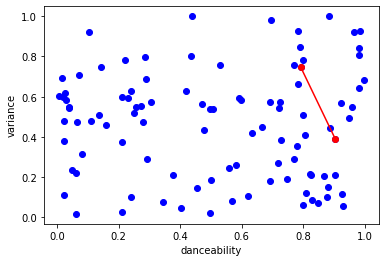

In [214]:
# visualizations for presentation
# x, y = np.random.random(size=(2,100))

plt.plot(x,y, 'bo')
plt.plot(x[[2,7]], y[[2,7]], 'ro-')
plt.xlabel('danceability')
plt.ylabel('variance')
#plt.show()
plt.savefig('connectedDots.svg')

In [211]:
from collections import defaultdict
import operator
multCosSims = defaultdict(float)
for val in range(len(featsCosSim)):
    multCosSims[val] = featsCosSim[2742][val]*featsCosSim[3041][val]
sorted(multCosSims.items(), key=operator.itemgetter(1))[-10:]

[(10171, 0.99998512732208),
 (4490, 0.9999851303064667),
 (6255, 0.9999851319452588),
 (11326, 0.9999851321573773),
 (4630, 0.9999851327511492),
 (12313, 0.9999851396467868),
 (2042, 0.9999851410080893),
 (6691, 0.9999851566308322),
 (5429, 0.9999851568562748),
 (11271, 0.9999851742596723)]

In [216]:
audioFeats.iloc[0]

acousticness          0.416675
danceability          0.675894
energy                0.634476
instrumentalness      0.010628
liveness              0.177647
speechiness           0.159310
tempo               165.922000
valence               0.576661
Name: 2, dtype: float64

In [51]:
audioFeats.sample(20)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
47384,0.857569,0.375386,0.566079,9.247116e-01,0.139589,0.043870,129.631,0.347815
1179,0.567229,0.384083,0.848396,8.717181e-01,0.154912,0.089434,132.028,0.354431
1794,0.319943,0.394085,0.527469,1.565024e-01,0.169254,0.095547,116.578,0.759909
23309,0.053820,0.536819,0.629176,5.989581e-01,0.096509,0.371786,82.056,0.029554
5013,0.995796,0.473116,0.291989,9.700675e-01,0.489870,0.155204,225.366,0.986451
10680,0.995448,0.171540,0.070906,9.709736e-01,0.143085,0.039443,96.118,0.265585
29497,0.678484,0.707758,0.220955,8.588870e-01,0.097671,0.062522,118.148,0.771303
33598,0.825266,0.662536,0.599580,9.398974e-01,0.076577,0.056716,106.002,0.036358
99027,0.004816,0.556252,0.834454,5.252209e-01,0.243434,0.036199,139.865,0.186277


In [159]:
tracks[(tracks['track_id'] == 2) | 
       (tracks['track_id'] == 10214) | 
       (tracks['track_id'] == 104074)| 
       (tracks['track_id'] == 4498) | 
       (tracks['track_id'] == 11419) | 
       (tracks['track_id'] == 20749) |
       (tracks['track_id'] == 37014)][['artist_name','track_title']]

,artist_name,track_title
0,AWOL,Food
2735,We Are the Arm,Realming
5528,Panicphobia,About Stones and Gravity
6326,Daniel Veesey,"Sonata No. 07 in D Major, Op. 10 No. 3 - IV. R..."
13112,Manhattan Ladies Quartette,Pussy's in the Well
25182,Meczûp,A Tale For Lancinant Screws
70254,Overlake,Is This Something?


In [215]:
tracks[(tracks['track_id'] == 2)][['artist_name','track_title']]
# tracks[(tracks['track_id'] == 10214)][['artist_name','track_title']]
# tracks[(tracks['track_id'] == 104074)][['artist_name','track_title']]
# tracks[(tracks['track_id'] == 4498)][['artist_name','track_title']]
# tracks[(tracks['track_id'] == 11419)][['artist_name','track_title']]
# tracks[(tracks['track_id'] == 20749)][['artist_name','track_title']]
# tracks[(tracks['track_id'] == 37014)][['artist_name','track_title']]

,artist_name,track_title
0,AWOL,Food


In [164]:
tracks.iloc[0].track_url

'http://freemusicarchive.org/music/AWOL/AWOL_-_A_Way_Of_Life/Food'